In [26]:
import pandas as pd

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
file_path = '/content/drive/MyDrive/machine learning file/Smart_Rainwater_Harvesting_Dataset.csv'
df_raw = pd.read_csv(file_path)
print("📄 RAW COLUMNS:", df_raw.columns.tolist())
print(df_raw.head(5))

📄 RAW COLUMNS: ['House_ID', 'Location', 'Roof_Area(sqm)', 'Rainfall_mm', 'Water_Collected_Liters', 'Water_Used_Liters', 'Water_Wasted_Liters', 'Storage_Tank_Capacity_Liters', 'Overflow_Incident', 'Usage_Purpose', 'Date']
   House_ID Location  Roof_Area(sqm)  Rainfall_mm  Water_Collected_Liters  \
0         1  গ্রাম-1              51         8.76                  402.22   
1         1  গ্রাম-4              51        15.68                  719.87   
2         1  গ্রাম-4              51        30.78                 1199.00   
3         1  গ্রাম-5              51        41.61                 1199.00   
4         1  গ্রাম-3              51        24.37                 1118.76   

   Water_Used_Liters  Water_Wasted_Liters  Storage_Tank_Capacity_Liters  \
0             386.08                16.13                          1199   
1             207.71               512.16                          1199   
2             117.61              1081.39                          1199   
3             42

In [29]:
rename_dict = {}
for col in df_raw.columns:
    c = col.lower()
    if 'rain' in c: rename_dict[col] = 'Rain_mm'
    elif 'start' in c: rename_dict[col] = 'Tank_start_L'
    elif 'end' in c: rename_dict[col] = 'Tank_end_L'
    elif 'harvest' in c: rename_dict[col] = 'Harvested_L'
    elif 'irrig' in c: rename_dict[col] = 'Irrigation_L'
    elif 'main' in c or 'topup' in c: rename_dict[col] = 'Mains_topup_L'
    elif 'date' in c: rename_dict[col] = 'Date'


In [30]:
df = df_raw.rename(columns=rename_dict)

In [31]:
print("\n✅ After renaming:")
print(df.columns.tolist())



✅ After renaming:
['House_ID', 'Location', 'Roof_Area(sqm)', 'Rain_mm', 'Water_Collected_Liters', 'Water_Used_Liters', 'Water_Wasted_Liters', 'Storage_Tank_Capacity_Liters', 'Overflow_Incident', 'Usage_Purpose', 'Date']


In [32]:
for col in ['Rain_mm','Tank_start_L','Tank_end_L','Harvested_L','Irrigation_L','Mains_topup_L']:
    if col not in df.columns:
        df[col] = 0

In [33]:
num_cols = ['Rain_mm','Tank_start_L','Tank_end_L','Harvested_L','Irrigation_L','Mains_topup_L']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

In [34]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

In [35]:
print("\n📊 Column totals:")
print(df[num_cols].sum())


📊 Column totals:
Rain_mm          22364.1
Tank_start_L         0.0
Tank_end_L           0.0
Harvested_L          0.0
Irrigation_L         0.0
Mains_topup_L        0.0
dtype: float64


In [36]:
df = df.sort_values('Date')

/tmp/ipython-input-1756908406.py:9: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


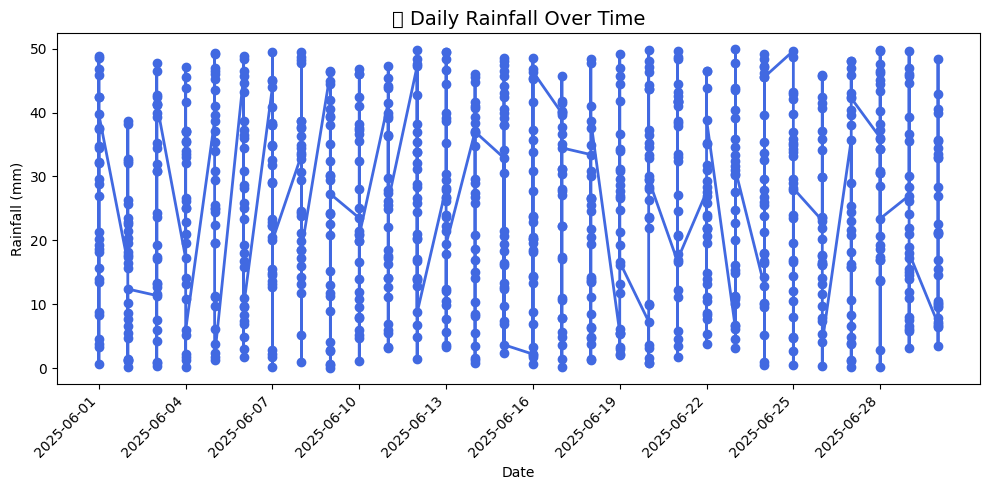

In [41]:


# 2️⃣ Fix weird date spacing (show fewer x labels)
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Rain_mm'], marker='o', color='royalblue', linewidth=2)
plt.title("🌧️ Daily Rainfall Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.xticks(df['Date'][::max(1, len(df)//10)], rotation=45, ha='right')  # show ~10 evenly spaced labels
plt.grid(True, linestyle='--', alpha=0.001)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2537093243.py:10: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


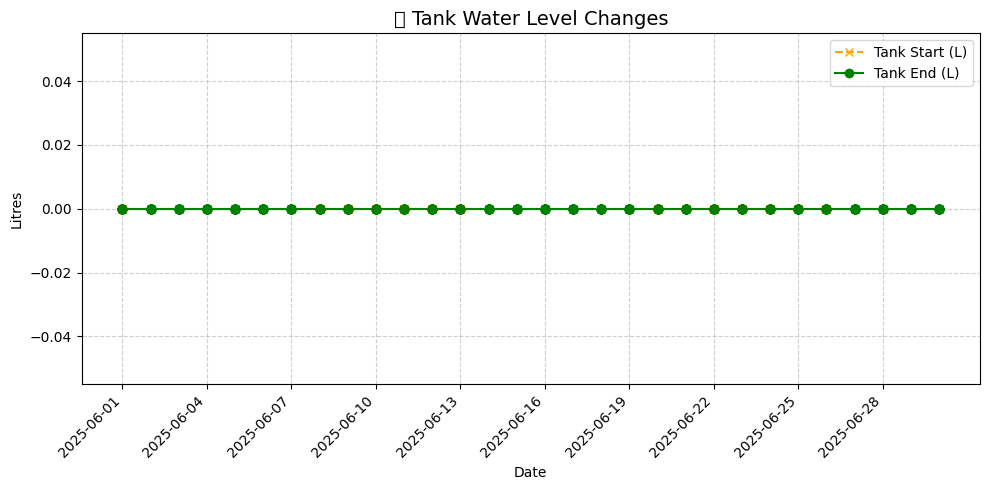

In [38]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Tank_start_L'], label='Tank Start (L)', linestyle='--', marker='x', color='orange')
plt.plot(df['Date'], df['Tank_end_L'], label='Tank End (L)', marker='o', color='green')
plt.title("💧 Tank Water Level Changes", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Litres")
plt.legend()
plt.xticks(df['Date'][::max(1, len(df)//10)], rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2691247086.py:9: UserWarning: Glyph 128703 (\N{SHOWER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128703 (\N{SHOWER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


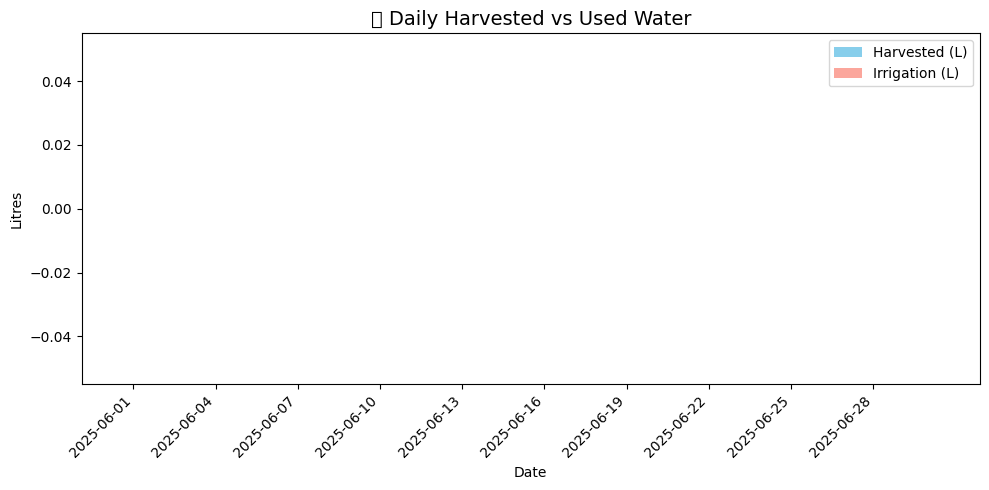